# **1. Load and Explore the Dataset**

## **1.1 Load Required Libraries**

In [1]:
!pip install pandas matplotlib seaborn scikit-learn torch -q

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, r2_score
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

## **1.2: Load First 5000 Rows of Dataset**

In [58]:
df = pd.read_csv('processes_datasets.csv')
print("Shape:", df.shape)
df.head()

Shape: (404176, 29)


,JobID,SubmitTime,WaitTime,RunTime,NProcs,AverageCPUTimeUsed,Used Memory,ReqNProcs,ReqTime:,ReqMemory,...,JobStructureParams,UsedNetwork,UsedLocalDiskSpace,UsedResources,ReqPlatform,ReqNetwork,ReqLocalDiskSpace,ReqResources,VOID,ProjectID
0,1,1136070024,203761,138467,1,138371,98652,1,259200,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,2,1136070690,0,11,1,4,35848,1,259200,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,3,1136071207,117,201203,1,0,0,1,259200,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,4,1136071267,4406,196985,1,0,0,1,259200,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,5,1136071269,202516,19520,1,18731,522268,1,259200,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404176 entries, 0 to 404175
Data columns (total 29 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   JobID               404176 non-null  int64 
 1   SubmitTime          404176 non-null  int64 
 2   WaitTime            404176 non-null  int64 
 3   RunTime             404176 non-null  int64 
 4   NProcs              404176 non-null  int64 
 5   AverageCPUTimeUsed  404176 non-null  int64 
 6   Used Memory         404176 non-null  int64 
 7   ReqNProcs           404176 non-null  int64 
 8   ReqTime:            404176 non-null  int64 
 9   ReqMemory           404176 non-null  int64 
 10  Status              404176 non-null  int64 
 11  UserID              404176 non-null  object
 12  GroupID             404176 non-null  object
 13  ExecutableID        404176 non-null  object
 14  QueueID             404176 non-null  object
 15  PartitionID         404176 non-null  int64 
 16  Or

In [60]:
df.columns

Index(['JobID', 'SubmitTime', 'WaitTime', 'RunTime ', 'NProcs',
       'AverageCPUTimeUsed', 'Used Memory', 'ReqNProcs', 'ReqTime: ',
       'ReqMemory', 'Status', 'UserID', 'GroupID', 'ExecutableID', 'QueueID',
       'PartitionID', 'OrigSiteID', 'LastRunSiteID', 'JobStructure',
       'JobStructureParams', 'UsedNetwork', 'UsedLocalDiskSpace',
       'UsedResources', 'ReqPlatform', 'ReqNetwork', 'ReqLocalDiskSpace',
       'ReqResources', 'VOID', 'ProjectID'],
      dtype='object')

## **1.3: Drop Columns with All -1**

In [61]:
selected_columns = ['SubmitTime', 'UserID', 'Used Memory', 'ReqTime: ', 'ReqMemory', 'RunTime ']
df_filtered = df[selected_columns].copy()
#df_filtered = df_filtered[df_filtered['RunTime '] > 0]  # remove rows with 0 or invalid target
print("Selected features and target:", df_filtered.columns.tolist())
df_filtered.head()

Selected features and target: ['SubmitTime', 'UserID', 'Used Memory', 'ReqTime: ', 'ReqMemory', 'RunTime ']


,SubmitTime,UserID,Used Memory,ReqTime:,ReqMemory,RunTime
0,1136070024,U2004S1,98652,259200,-1,138467
1,1136070690,U1023S0,35848,259200,-1,11
2,1136071207,U2035S1,0,259200,-1,201203
3,1136071267,U2035S1,0,259200,-1,196985
4,1136071269,U2035S1,522268,259200,-1,19520


In [62]:
df_filtered

,SubmitTime,UserID,Used Memory,ReqTime:,ReqMemory,RunTime
0,1136070024,U2004S1,98652,259200,-1,138467
1,1136070690,U1023S0,35848,259200,-1,11
2,1136071207,U2035S1,0,259200,-1,201203
3,1136071267,U2035S1,0,259200,-1,196985
4,1136071269,U2035S1,522268,259200,-1,19520
...,...,...,...,...,...,...
404171,1167603618,U41,0,259200,-1,56
404172,1167603624,U41,61084,259200,-1,57
404173,1167603637,U41,0,259200,-1,45
404174,1167603747,U41,0,259200,-1,43


In [63]:
df['JobStructureParams'].value_counts()

JobStructureParams
-1    404176
Name: count, dtype: int64

In [18]:
df_filtered.head()

,SubmitTime,UserID,Used Memory,ReqTime:,ReqMemory,RunTime
0,1136070024,U2004S1,98652,259200,-1,138467
1,1136070690,U1023S0,35848,259200,-1,11
2,1136071207,U2035S1,0,259200,-1,201203
3,1136071267,U2035S1,0,259200,-1,196985
4,1136071269,U2035S1,522268,259200,-1,19520


In [19]:
df_filtered['ReqMemory'].value_counts()

ReqMemory
-1          368345
 819200      29369
 1126400      5542
 614400        714
 512000        186
 524288         17
 262144          2
 921600          1
Name: count, dtype: int64

## **1.4 Drop columns containing IDs**

In [ ]:
# columns_to_drop = [
#     'JobID', 'UserID', 'GroupID', 'QueueID',
#     'ExecutableID', 'PartitionID', 'OrigSiteID', 'LastRunSiteID'
# ]
# df_filtered.drop(columns=[col for col in columns_to_drop if col in df_filtered.columns], inplace=True)
# print("Shape:", df_filtered.shape)

In [64]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_filtered['UserID'] = le.fit_transform(df_filtered['UserID'])

In [65]:
df_filtered.columns

Index(['SubmitTime', 'UserID', 'Used Memory', 'ReqTime: ', 'ReqMemory',
       'RunTime '],
      dtype='object')

In [66]:
# using first 5000 datatpoints
df_filtered = df_filtered.head(5000)
print("Shape:", df_filtered.shape)

Shape: (5000, 6)


In [67]:
# exclude process with no burst time i.e., -1
df_filtered = df_filtered[df_filtered['RunTime '] != -1]
print("Shape:", df_filtered.shape)

Shape: (4340, 6)


In [68]:
df_filtered.head()

,SubmitTime,UserID,Used Memory,ReqTime:,ReqMemory,RunTime
0,1136070024,133,98652,259200,-1,138467
1,1136070690,27,35848,259200,-1,11
2,1136071207,167,0,259200,-1,201203
3,1136071267,167,0,259200,-1,196985
4,1136071269,167,522268,259200,-1,19520


## **1.5 Split dataset**

In [69]:
# Target
y = df_filtered['RunTime ']

# Features
X = df_filtered.drop(columns=['RunTime '])

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0,shuffle=False)

In [70]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3472, 5)
y_train shape: (3472,)
X_test shape: (868, 5)
y_test shape: (868,)


In [71]:
X_train

,SubmitTime,UserID,Used Memory,ReqTime:,ReqMemory
0,1136070024,133,98652,259200,-1
1,1136070690,27,35848,259200,-1
2,1136071207,167,0,259200,-1
3,1136071267,167,0,259200,-1
4,1136071269,167,522268,259200,-1
...,...,...,...,...,...
3969,1137075251,16,256324,259200,-1
3970,1137075296,41,0,259200,-1
3971,1137075311,16,0,259200,-1
3972,1137075370,16,0,259200,-1


## **1.6: Normalize data**

In [72]:
from sklearn.preprocessing import MinMaxScaler

# Normalize minmax
scaler_X = MinMaxScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

In [28]:
X_train

array([[0.00000000e+00, 3.58333333e-01, 3.85795203e-02, 1.00000000e+00,
        0.00000000e+00],
       [6.62457179e-04, 6.38888889e-02, 1.40189620e-02, 1.00000000e+00,
        0.00000000e+00],
       [1.17670697e-03, 4.52777778e-01, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00],
       ...,
       [9.99939324e-01, 3.33333333e-02, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00],
       [9.99998011e-01, 3.33333333e-02, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00],
       [1.00000000e+00, 3.33333333e-02, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00]], shape=(3472, 5))

## Reshape data for RNN

In [75]:
time_steps = 3
n_features = X_train.shape[1]

# Trim X_train to be divisible by time_steps
trim = X_train.shape[0] % time_steps
if trim != 0:
    X_train = X_train[:-trim]
    y_train = y_train[:-trim]

X_train_rnn = X_train.reshape((-1, time_steps, n_features))
# y_train_rnn = y_train.reshape((-1, time_steps))  # Optional

# Do the same for test set
trim_test = X_test.shape[0] % time_steps
if trim_test != 0:
    X_test = X_test[:-trim_test]
    y_test = y_test[:-trim_test]

X_test_rnn = X_test.reshape((-1, time_steps, n_features))
#y_test_rnn = y_test.reshape((-1, time_steps))  # Optional


In [76]:
X_train_rnn.shape

(1157, 3, 5)

In [77]:
X_test_rnn.shape

(289, 3, 5)

# **2. Train MLP Regressor on Filtered Data**

## **2.1: Define Dataset and DataLoaders**

In [80]:
import torch
from torch.utils.data import Dataset, DataLoader

# Custom dataset class
class ProcessDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y.to_numpy(), dtype=torch.float32).view(-1, 1)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Create datasets and loaders
train_ds = ProcessDataset(X_train_rnn, y_train)
test_ds = ProcessDataset(X_test_rnn, y_test)

train_loader = DataLoader(train_ds, batch_size=64, shuffle=True)
test_loader = DataLoader(test_ds, batch_size=64)

## Define the RNN Regressor in PyTorch

In [81]:
class LSTMRegressor(nn.Module):
    def __init__(self, input_size, hidden_size=64, num_layers=3, dropout=0.3):
        super(LSTMRegressor, self).__init__()
        self.lstm = nn.LSTM(input_size=input_size,
                            hidden_size=hidden_size,
                            num_layers=num_layers,
                            dropout=dropout,
                            batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out, _ = self.lstm(x)          # out: (batch, time_step, hidden_size)
        out = out[:, -1, :]            # take output from last time step
        return self.fc(out)

## **2.3: Training Function**

In [82]:
def train_model(model, dataloader, optimizer, criterion, device, num_epochs=50):
    model.train()
    epoch_losses = []

    for epoch in range(num_epochs):
        running_loss = 0.0
        for X_batch, y_batch in dataloader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        avg_loss = running_loss / len(dataloader)
        epoch_losses.append(avg_loss)
        if (epoch + 1) % 100 == 0:
            print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}")

    return epoch_losses

## **2.4: Evaluation Metrics**

In [83]:
def evaluate_model(model, dataloader, y_true, device):
    model.eval()
    preds = []

    with torch.no_grad():
        for X_batch, _ in dataloader:
            X_batch = X_batch.to(device)
            y_pred = model(X_batch)
            preds.append(y_pred.cpu().numpy())

    y_pred = np.vstack(preds).flatten()
    y_true = y_true.flatten()

    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    cc = np.corrcoef(y_true, y_pred)[0, 1]
    rae = np.sum(np.abs(y_true - y_pred)) / np.sum(np.abs(y_true - np.mean(y_true)))

    return {
        'MAE': mae,
        'R2': r2,
        'CC': cc,
        'RAE (%)': rae * 100
    }

In [84]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cpu


## **2.5: Train RNN Model**

In [85]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

input_size = X_train_rnn.shape[2]

# number of epochs
num_epochs = 15000

# initialize model and optimizer
model = LSTMRegressor(input_size=input_size, hidden_size=64, num_layers=3, dropout=0.3).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

# Train and collect loss per epoch
loss_history = train_model(model, train_loader, optimizer, criterion, device, num_epochs=num_epochs)
torch.save(model.state_dict(), 'non-hist_rnn_burst_predictor.pth')

Using device: cpu
Epoch 100/15000, Loss: 2297237045.8947
Epoch 200/15000, Loss: 2201941072.8421
Epoch 300/15000, Loss: 2106926926.4112
Epoch 400/15000, Loss: 2102335647.4079
Epoch 500/15000, Loss: 2097677006.8158
Epoch 600/15000, Loss: 2093060779.4737
Epoch 700/15000, Loss: 2179048818.5263
Epoch 800/15000, Loss: 2090413812.2105
Epoch 900/15000, Loss: 2253113121.6842
Epoch 1000/15000, Loss: 2244749898.1053
Epoch 1100/15000, Loss: 2070408653.1842
Epoch 1200/15000, Loss: 2595858849.6842
Epoch 1300/15000, Loss: 2230188416.0000
Epoch 1400/15000, Loss: 2057178590.5921
Epoch 1500/15000, Loss: 2139547856.8421
Epoch 1600/15000, Loss: 2048421514.8849
Epoch 1700/15000, Loss: 2127838147.3684
Epoch 1800/15000, Loss: 2125020490.1053
Epoch 1900/15000, Loss: 2038587594.1053
Epoch 2000/15000, Loss: 2115519750.7368
Epoch 2100/15000, Loss: 2114868924.6316
Epoch 2200/15000, Loss: 2023167563.7105
Epoch 2300/15000, Loss: 2018999240.2500
Epoch 2400/15000, Loss: 2100785997.4737
Epoch 2500/15000, Loss: 2209714

In [86]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

def loss_plot(num_epochs, loss_history):
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, num_epochs + 1), loss_history)
    plt.title("Training Loss Curve (MLP)")
    plt.xlabel("Epoch")
    plt.ylabel("MSE Loss")
    plt.grid(True)
    plt.show()

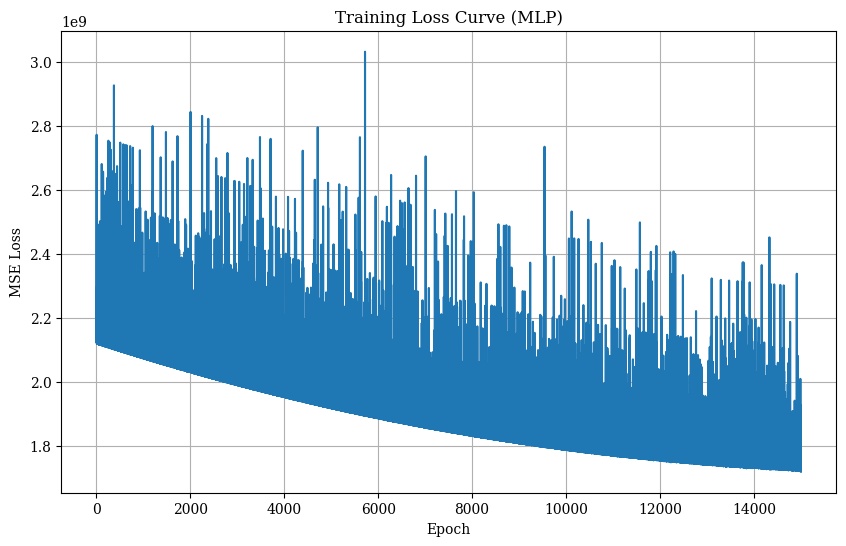

In [87]:
loss_plot(num_epochs, loss_history)

# **3. Model Evaluation and Prediction**

### Load saved model

In [88]:
class LSTMRegressor(nn.Module):
    def __init__(self, input_size, hidden_size=64, num_layers=3, dropout=0.3):
        super(LSTMRegressor, self).__init__()
        self.lstm = nn.LSTM(input_size=input_size,
                            hidden_size=hidden_size,
                            num_layers=num_layers,
                            dropout=dropout,
                            batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out, _ = self.lstm(x)          # out: (batch, time_step, hidden_size)
        out = out[:, -1, :]            # take output from last time step
        return self.fc(out)

In [89]:
from sklearn.preprocessing import MinMaxScaler
import joblib  # For saving/loading the scaler

# Initialize and fit on training data
scaler_X = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Optional: Save scaler for later use
joblib.dump(scaler_X, 'scaler_X.pkl')

['scaler_X.pkl']

In [34]:
time_steps = 3
n_features = X_train_scaled.shape[1]

# Trim training data
trim = X_train_scaled.shape[0] % time_steps
if trim != 0:
    X_train_scaled = X_train_scaled[:-trim]
    y_train = y_train[:-trim]

X_train_rnn = X_train_scaled.reshape(-1, time_steps, n_features)

# Trim and reshape test data
trim_test = X_test_scaled.shape[0] % time_steps
if trim_test != 0:
    X_test_scaled = X_test_scaled[:-trim_test]
    y_test = y_test[:-trim_test]

X_test_rnn = X_test_scaled.reshape(-1, time_steps, n_features)

In [46]:
# Match input size
input_size = n_features  # typically 5 in your case

# Load model
model = LSTMRegressor(input_size=input_size)
model.load_state_dict(torch.load('non-hist_rnn_burst_predictor.pth'))

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

LSTMRegressor(
  (lstm): LSTM(5, 64, num_layers=3, batch_first=True, dropout=0.3)
  (fc): Linear(in_features=64, out_features=1, bias=True)
)

In [91]:
# Convert test data to tensor
X_tensor = torch.tensor(X_test_rnn, dtype=torch.float32).to(device)

# Predict
with torch.no_grad():
    y_pred = model(X_tensor)  # shape: (num_samples, 1)

# If needed: move to CPU and convert to NumPy
y_pred_np = y_pred.cpu().numpy()

## **3.1: Evaluation metrics**

In [92]:
# y_test must be a numpy array or torch tensor (already flattened)
results = evaluate_model(model, test_loader, y_test_seq, device)

# Print results
print("Evaluation Metrics:")
for k, v in results.items():
    print(f"{k}: {v:.4f}")

Evaluation Metrics:
MAE: 23638.5371
R2: -0.0062
CC: nan
RAE (%): 95.3304


/home/nsriad/miniconda3/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/nsriad/miniconda3/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


## **3.2: Prediction**

In [93]:
model.eval()
predictions = []

with torch.no_grad():
    for X_batch, _ in test_loader:
        X_batch = X_batch.to(device)
        y_pred = model(X_batch)
        predictions.append(y_pred.cpu().numpy())

# Flatten into one array
y_pred = np.vstack(predictions).flatten()

In [94]:
# Convert true y values to a flat array if not already
y_true = y_test.values.flatten()

In [95]:
# Show a few examples
import pandas as pd

comparison_df = pd.DataFrame({
    "Actual (RunTime)": y_true[20:40],
    "Predicted (RunTime)": y_pred[20:40]
})

# Round for cleaner display
comparison_df = comparison_df.round(2)

# Display as table
comparison_df

,Actual (RunTime),Predicted (RunTime)
0,20282,15840.580078
1,14,15840.580078
2,20642,15840.580078
3,19709,15840.580078
4,28,15840.580078
5,20914,15840.580078
6,20694,15840.580078
7,20327,15840.580078
8,19883,15840.580078
9,41,15840.580078


In [7]:
def plot_mlp_predictions(model, dataloader, y_test_raw, device, title="MLP"):
    model.eval()
    preds = []

    with torch.no_grad():
        for X_batch, _ in dataloader:
            X_batch = X_batch.to(device)
            y_pred = model(X_batch)
            preds.append(y_pred.cpu().numpy())

    y_pred = np.vstack(preds).flatten()
    y_true = y_test_raw.values.flatten()

    # Plot
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()],
             'r--', label='Perfect Prediction')
    plt.xlabel("Actual RunTime")
    plt.ylabel("Predicted RunTime")
    plt.title(f"{title} - Actual vs Predicted")
    plt.legend()
    plt.grid(True)
    plt.show()


In [ ]:
plot_mlp_predictions(model, test_loader, y_test, device, title="MLP Regressor")